In [2]:
#loading images
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

In [3]:
l = os.listdir('./kmeans/')

In [4]:
usual = cv2.imread('./train/'+l[1],cv2.IMREAD_GRAYSCALE)
km = cv2.imread('./kmeans/'+l[1],cv2.IMREAD_GRAYSCALE)

In [5]:
des = cv2.bitwise_not(usual)
contour,hier,a = cv2.findContours(des,cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)

for cnt in contour:
    cv2.drawContours(des,[contour],0,255,-1)

gray = cv2.bitwise_not(des)

error: OpenCV(3.4.2) C:\Miniconda3\conda-bld\opencv-suite_1534379934306\work\modules\imgproc\src\drawing.cpp:2515: error: (-215:Assertion failed) npoints > 0 in function 'cv::drawContours'


In [7]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3))
res = cv2.morphologyEx(km,cv2.MORPH_OPEN,kernel)

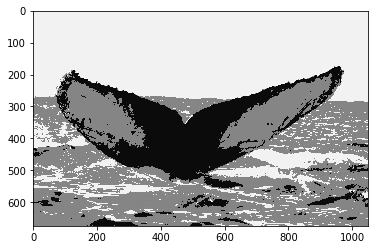

In [10]:
plt.imshow(km,'gray')

In [11]:
ret,thresh1 = cv2.threshold(km,127,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(km,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(km,127,255,cv2.THRESH_TRUNC)

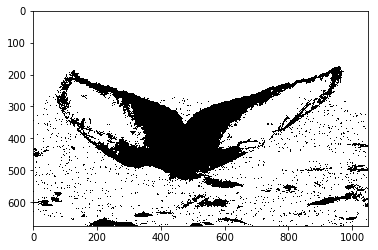

In [14]:
plt.imshow(thresh1,'gray')

In [25]:
kernel = np.ones((12,12),np.float32)/144
dst = cv2.filter2D(thresh1,-1,kernel)

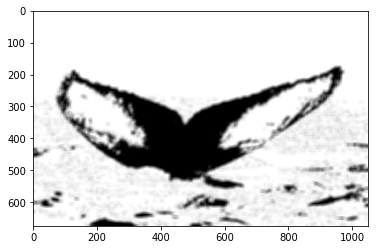

In [26]:
plt.imshow(dst,'gray')

In [27]:
th, im_th = cv2.threshold(dst, 220, 255, cv2.THRESH_BINARY_INV);
 
# Copy the thresholded image.
im_floodfill = im_th.copy()
 
# Mask used to flood filling.
# Notice the size needs to be 2 pixels than the image.
h, w = im_th.shape[:2]
mask = np.zeros((h+2, w+2), np.uint8)
 
# Floodfill from point (0, 0)
cv2.floodFill(im_floodfill, mask, (0,0), 255);
 
# Invert floodfilled image
im_floodfill_inv = cv2.bitwise_not(im_floodfill)
 
# Combine the two images to get the foreground.
im_out = im_th | im_floodfill_inv

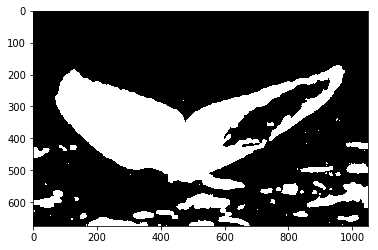

In [28]:
plt.imshow(im_out,'gray')